In [1]:
'''Import all the necessary packages'''
import glaes as gl
import geokit as gk
import geopandas as gpd
import pandas as pd


In [2]:
# Sources used:
# Source 1: Source 5\aeroway_ply\aeroway_ply_india.shp

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#india_outer = gpd.read_file(r"C:\Users\n.pawar\Calculations\Land Eligibility\Input\Source 7\gadm36_IND_shp\gadm36_IND_0.shp")

In [5]:
mainSource_inner = r"F:\hec\modeling\01_general_inputs\01_administrative_borders\gadm36_FIN_2_trimmed.shp"
df_mainSource_inner = gpd.read_file(mainSource_inner)

#mainSource_outer = r"C:\Users\n.pawar\Calculations\Land Eligibility\Input\Source 7\gadm36_IND_shp\gadm36_IND_0.shp"

In [6]:
technology = 'solar_pv'
constraint_name = 'airport_airfield'

In [11]:
# Filter file creation
'''The filter file should contain all the potential features that can fall under the given constraint type.
This file would be used to extract the applicable features from a shape file containing wider range of 
features.'''


allowed = ['allotments', 'bamboo', 'barren', 'basin', 'breeding', 'brownfield', 'faar', 'fixme', 'fo', 'grass',
           'green', 'green_belt', 'greenfield', 'heath', 'lawn', 'meadow', 'Not Reported', 'open space', 'Other Area', 'rei', 'resii', 'scrub', 
           'shrub', 'steps', 'traffic_island', 'village_green', 'vacant', 'water_wellfield', ]

##### Sociopolitical  #####

filter_airport_airfield = ['aerodrome', 'runway', 'apron', 'taxiway', 'terminal', 'hangar', 
                                     'parking_position']


In [7]:
# Source 1
'''The file 'raw' is a source file which contains more features than those required for a given constraint'''
raw_1 = gpd.read_file(r"F:\hec\modeling\01_LEA\02_inputs\01_general\aeroway_ply\aeroway_ply.shp")

In [13]:
raw_1.head()

,RelationId,WayId,aeroway,access,building,ele,iata,icao,layer,length,name,operator,ref,surface,width,geometry
0,13234,None,terminal,None,yes,None,None,None,None,None,Terminal A,None,None,None,None,"POLYGON ((13.28902 52.55487, 13.28890 52.55497..."
1,112384,None,runway,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-5.18142 51.71208, -5.18150 51.71164..."
2,147154,None,aerodrome,None,None,None,RIX,EVRA,None,None,"StarptautiskÄ lidosta ""RÄ«ga""",None,RIX,None,None,"POLYGON ((23.97953 56.92107, 23.97951 56.92096..."
3,154024,None,apron,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((-0.56337 51.34798, -0.56325 51.34783..."
4,370079,None,apron,None,None,None,None,None,None,None,None,None,None,paved,None,"MULTIPOLYGON (((23.95564 37.94207, 23.95556 37..."


In [8]:
# To display all the features contained in the given source file
raw_1.aeroway.unique()

array(['terminal', 'runway', 'aerodrome', 'apron', 'helipad', 'taxiway',
       'hangar', 'navigationaid', 'parachute_dropzone', 'deicing',
       'marking', 'gate', 'yes', 'heliport', 'tower', 'office', 'freight',
       'landing_strip', 'paraglider_landing_spot', 'hanger',
       'landing_paraglider', 'preserved', 'model_runway', 'operation',
       'Flugschule', 'ndb', 'aeroclub', 'resa', 'obstacle', 'free_flying',
       'airstrip', 'aerobridge', 'abandoned', 'compass_compensation',
       'miniature_aerodrome', 'signal_area', 'construction', 'clearway',
       'fuel', 'balloon_launch', 'jet_bridge',
       'Gleitschirm-_und_Drachenstartplatz', 'Winch Pad', 'proposed',
       'windsock', 'navigational', 'parking_position', 'weather station',
       'airside', 'control_tower', 'building', 'navigation_aid',
       'report_point', 'Control tower', 'ufopad', 'unclassified',
       'holding_position', 'airfield', 'User defined', 'signal area',
       'runway_disused', 'launchpad', 'spac

In [13]:
# Filtering the data
'''The file 'processed' would contain only the necessary features extracted from the corresponding 'raw' file.'''

processed_1 = raw_1[raw_1['aeroway'].isin(filter_airport_airfield)]
#road_proximity_trial.head()

In [14]:
processed_1.aeroway.unique()

array(['terminal', 'runway', 'aerodrome', 'apron', 'taxiway', 'hangar',
       'parking_position'], dtype=object)

In [15]:
def state_loop_tif_generator(demSource):
    for state_ID in range(len(df_mainSource_inner.index)):
    #for state_ID in range(1):
        rm = gk.RegionMask.load(mainSource_inner, where = state_ID, srs=india_srs, pixelSize=selected_pixel_size)
    
        ec = gl.ExclusionCalculator(rm) 
        print('Processing the state',df_mainSource_inner.iloc[state_ID]['NAME_1'],'...')
        
        ec.excludeVectorType(demSource, buffer=constraint_buffer) 
    
        ec.draw()
        ec.save(technology + "_" + constraint_name + "_" + df_mainSource_inner.iloc[state_ID]['NAME_1'] + ".tif")
        
    return

Processing the state Andaman and Nicobar ...
Processing the state Andhra Pradesh ...
Processing the state Arunachal Pradesh ...
Processing the state Assam ...
Processing the state Bihar ...
Processing the state Chandigarh ...
Processing the state Chhattisgarh ...
Processing the state Dadra and Nagar Haveli ...
Processing the state Daman and Diu ...
Processing the state Goa ...
Processing the state Gujarat ...
Processing the state Haryana ...
Processing the state Himachal Pradesh ...
Processing the state Jammu and Kashmir ...
Processing the state Jharkhand ...
Processing the state Karnataka ...
Processing the state Kerala ...
Processing the state Lakshadweep ...
Processing the state Madhya Pradesh ...
Processing the state Maharashtra ...
Processing the state Manipur ...


C:\Users\n.pawar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Processing the state Meghalaya ...
Processing the state Mizoram ...
Processing the state Nagaland ...
Processing the state NCT of Delhi ...
Processing the state Odisha ...
Processing the state Puducherry ...
Processing the state Punjab ...
Processing the state Rajasthan ...
Processing the state Sikkim ...
Processing the state Tamil Nadu ...
Processing the state Telangana ...
Processing the state Tripura ...
Processing the state Uttar Pradesh ...
Processing the state Uttarakhand ...
Processing the state West Bengal ...


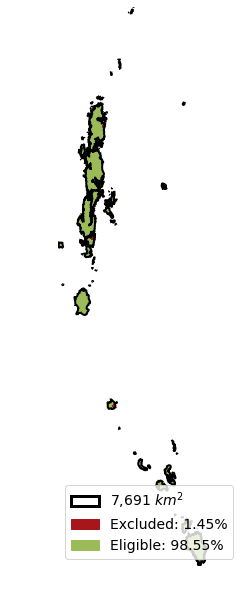

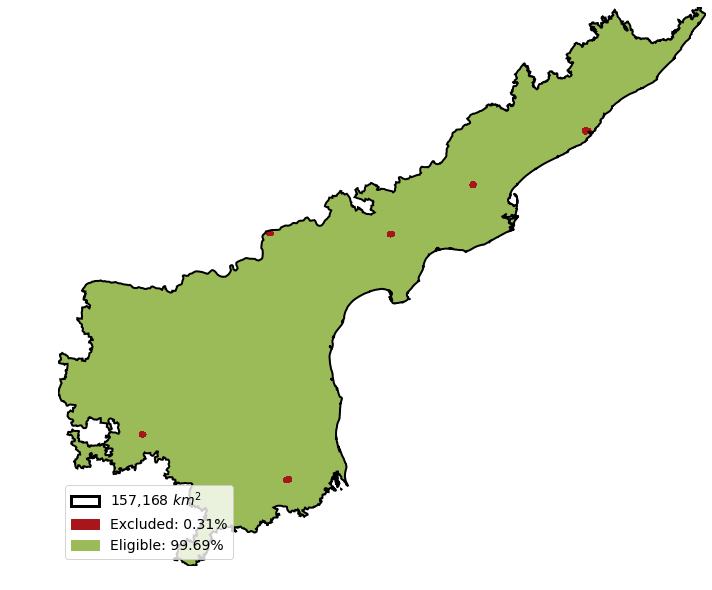

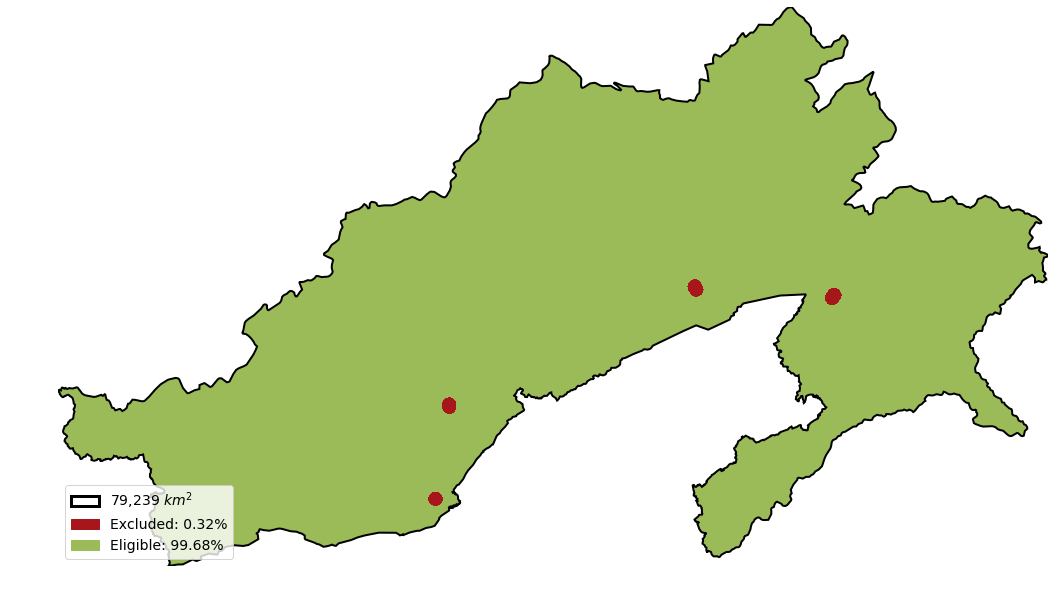

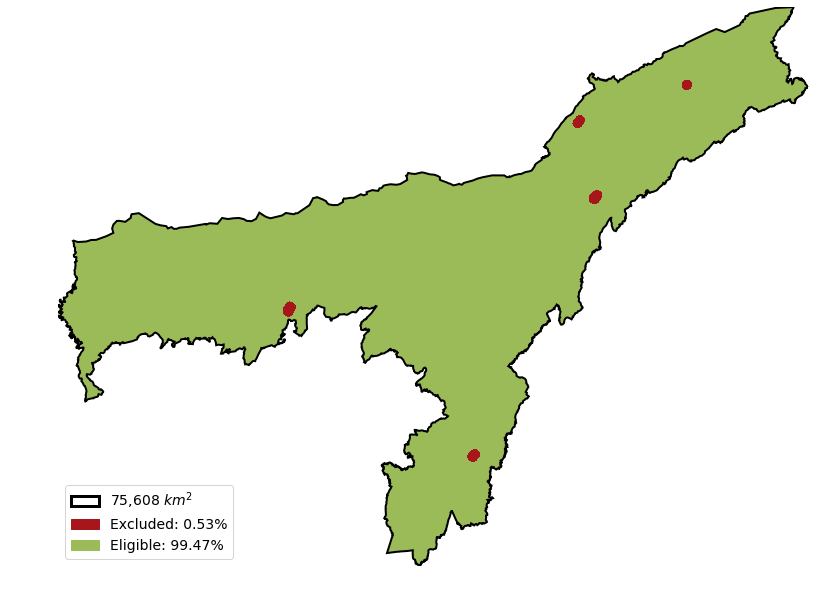

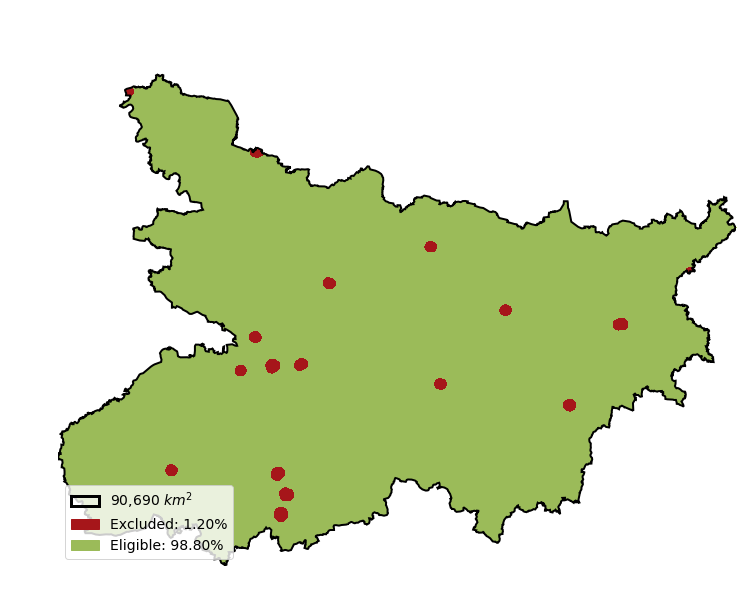

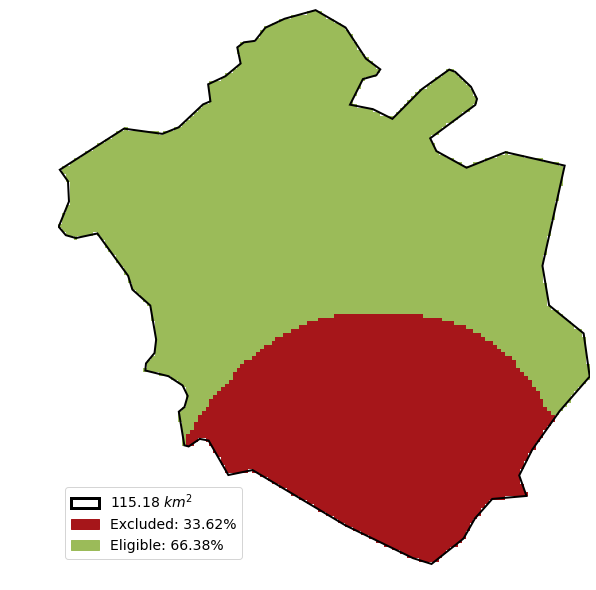

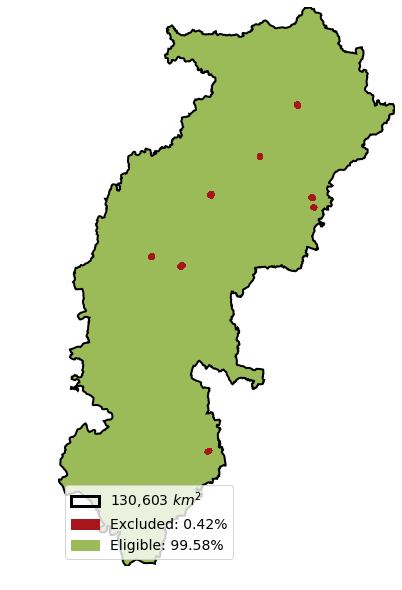

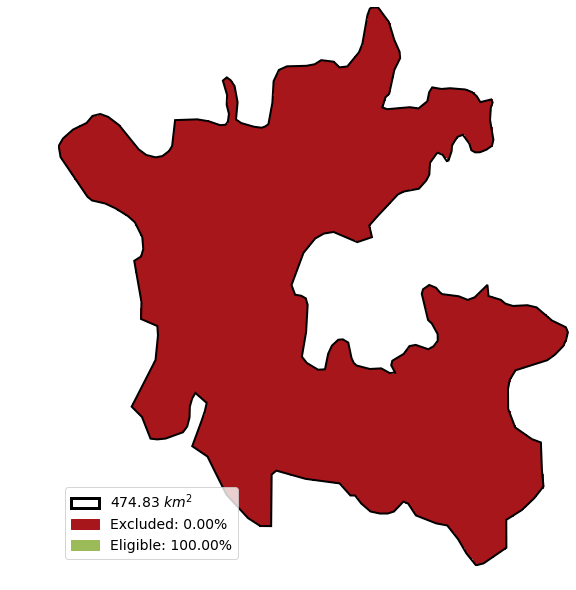

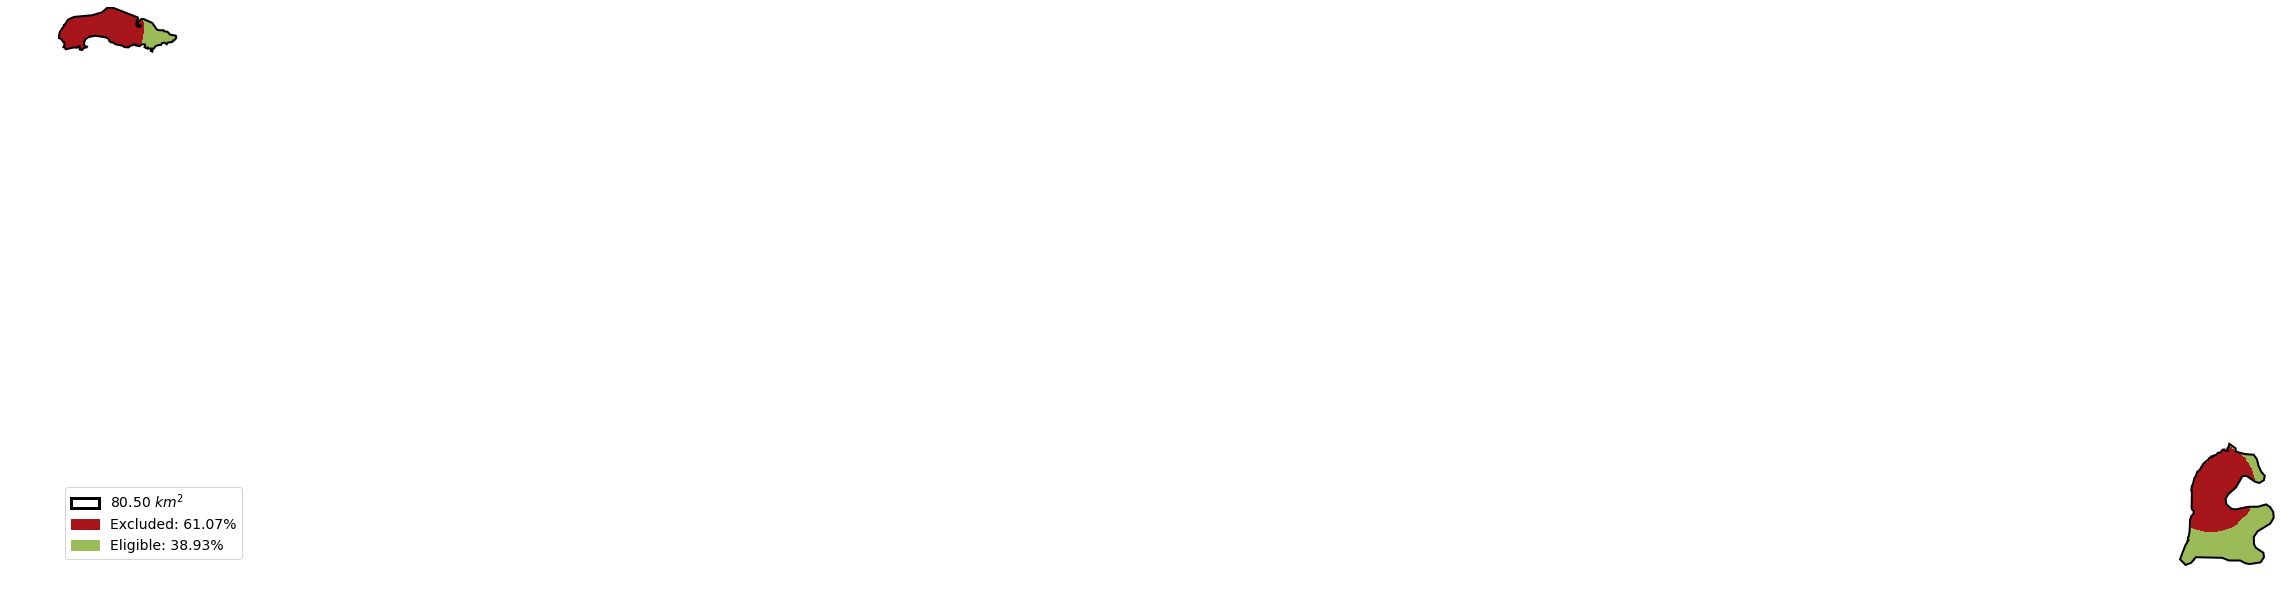

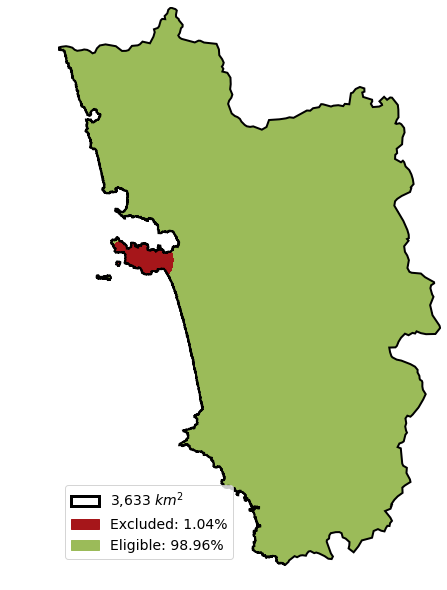

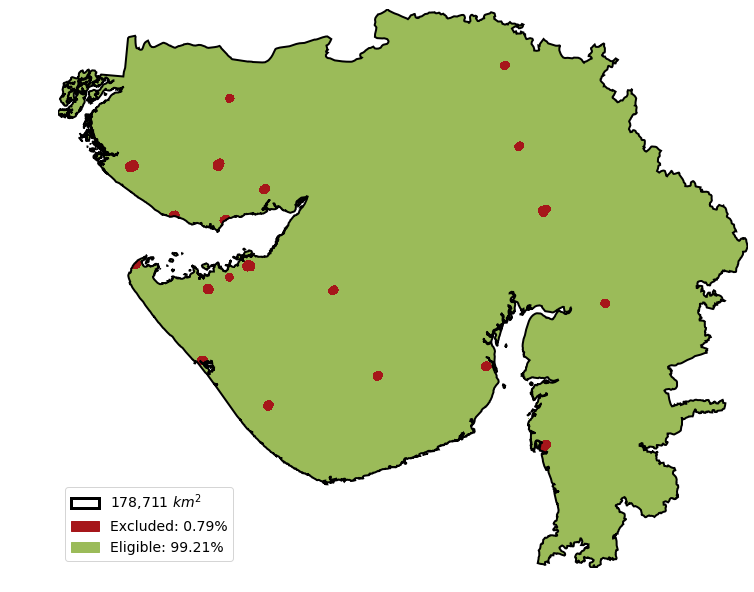

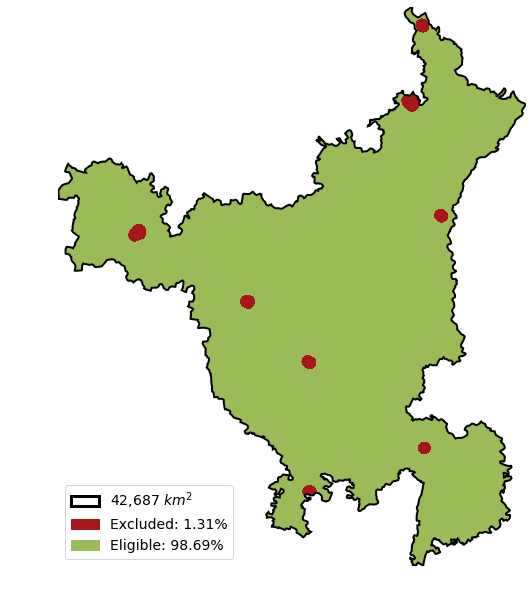

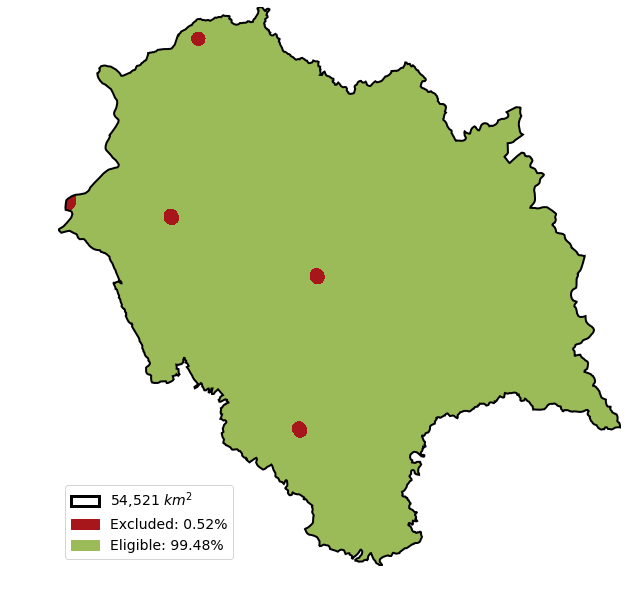

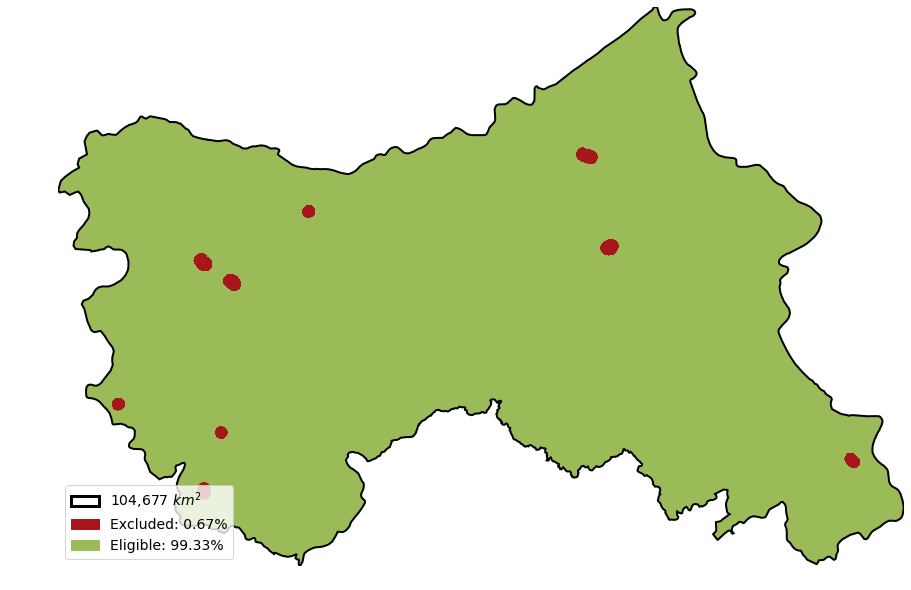

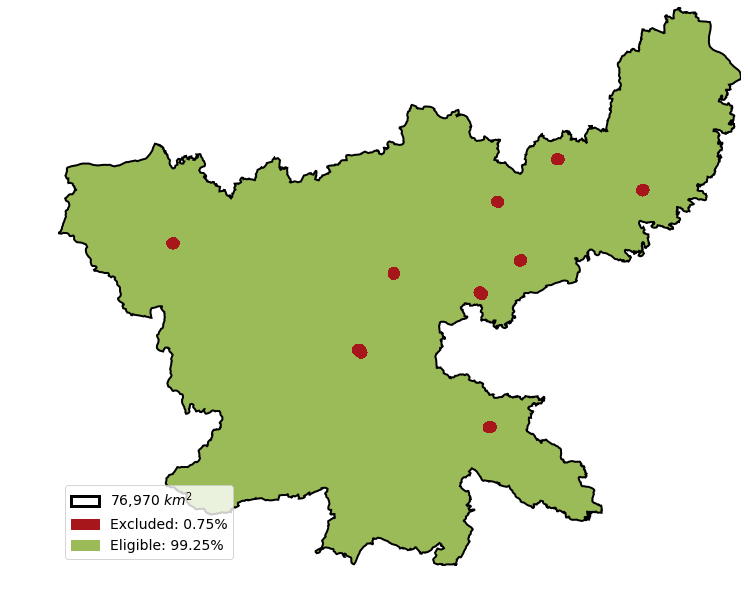

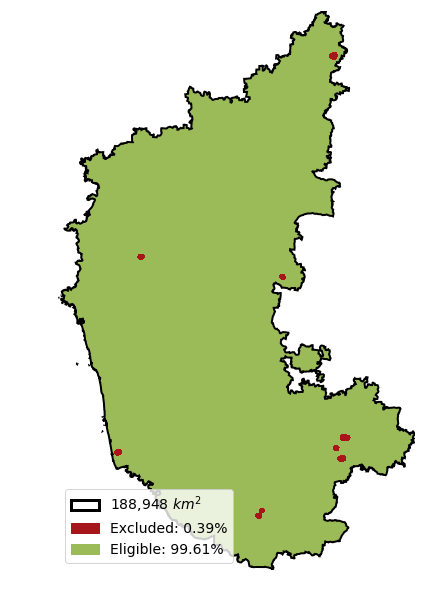

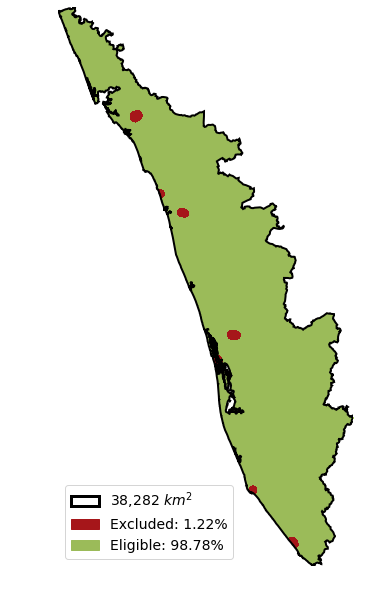

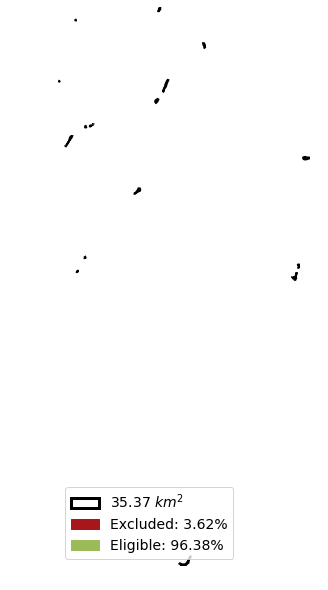

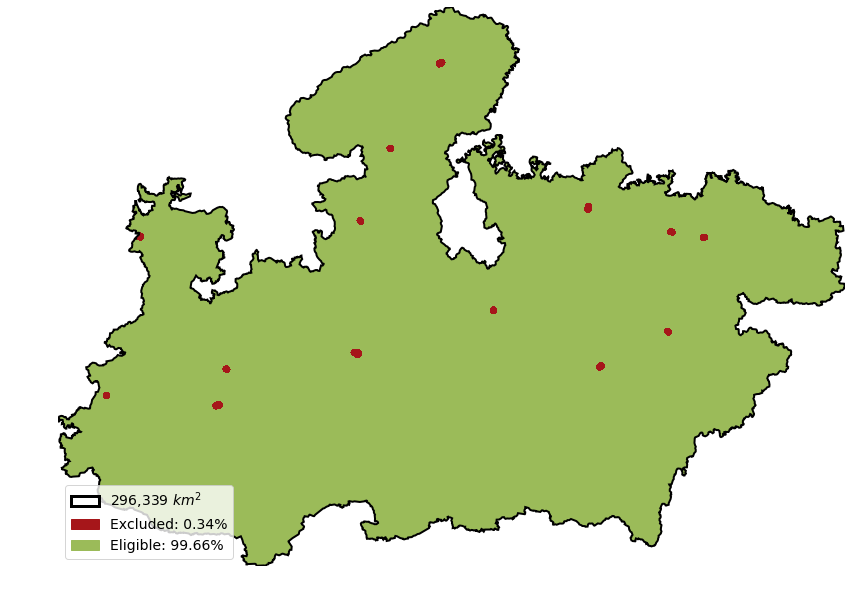

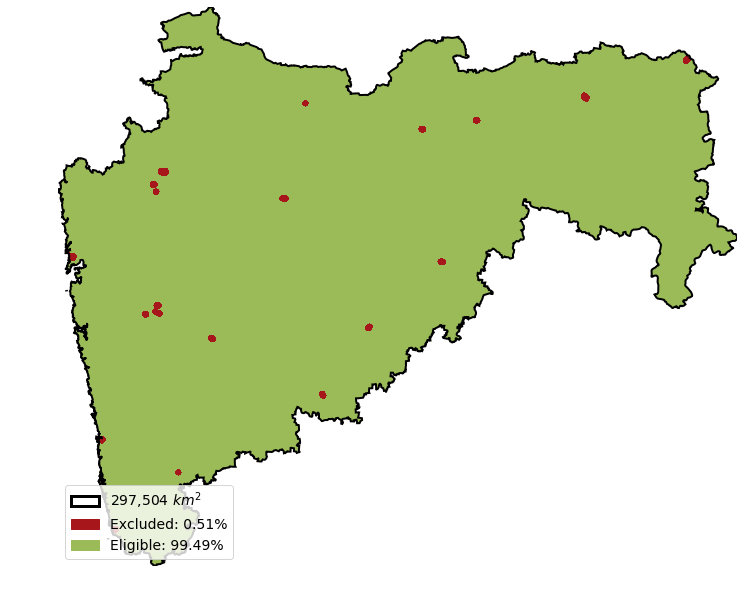

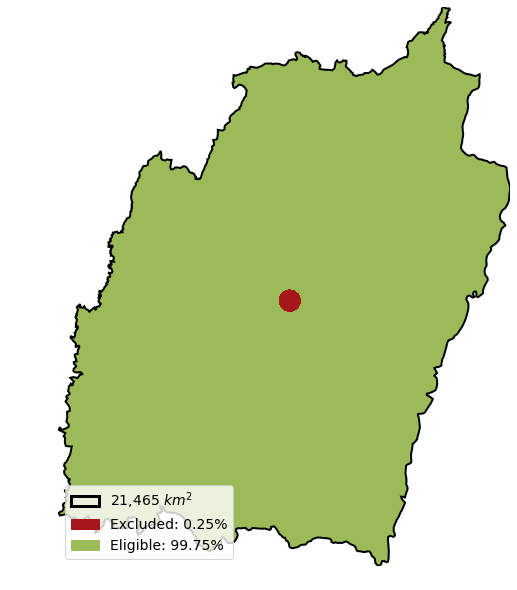

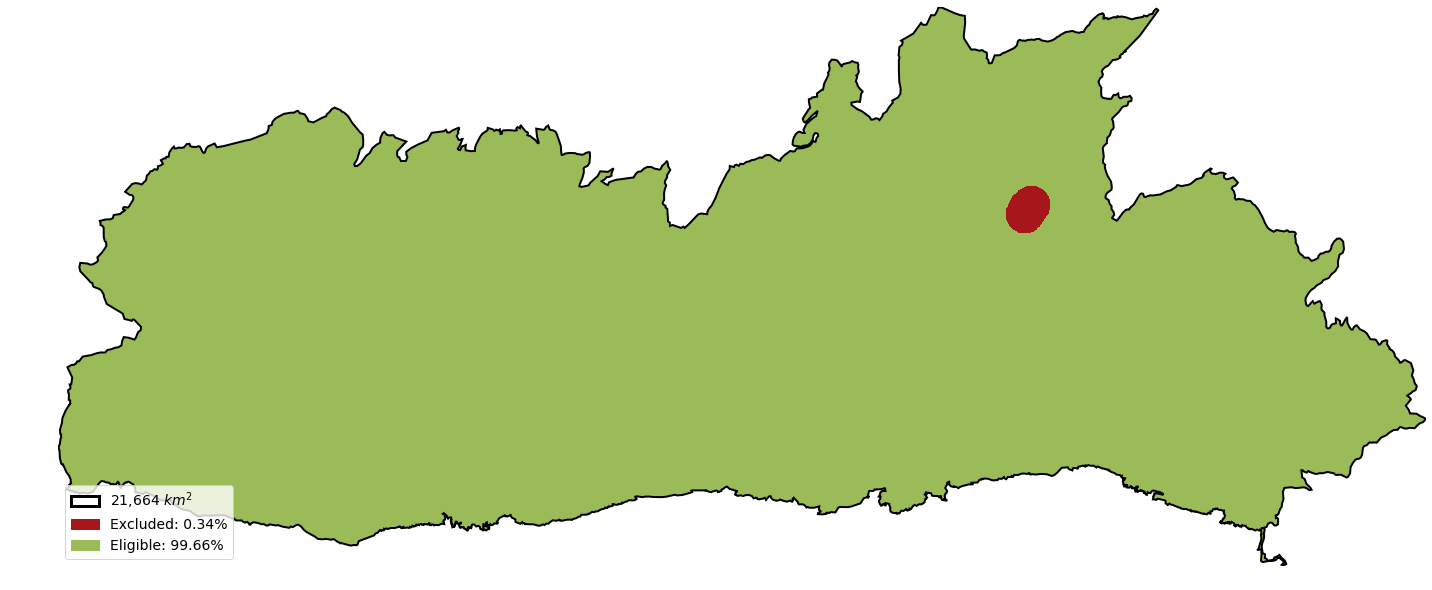

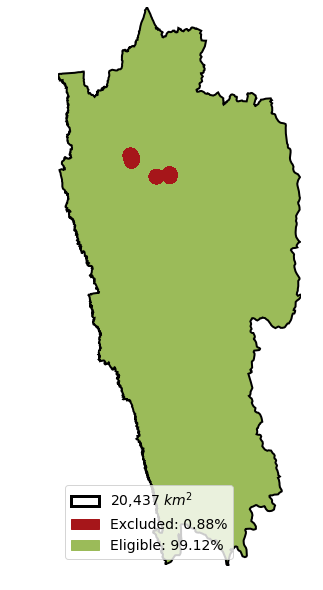

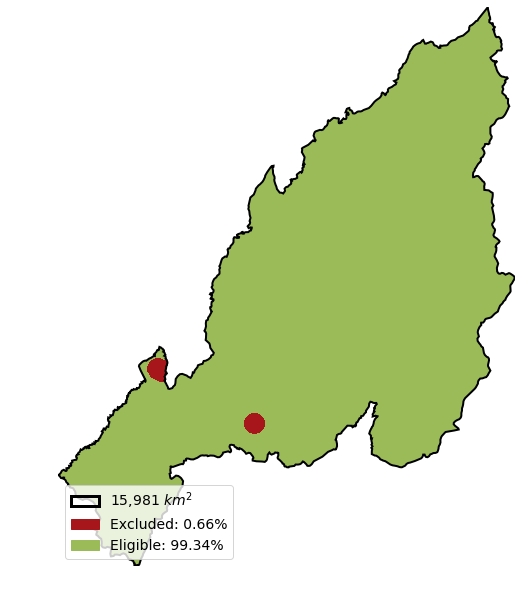

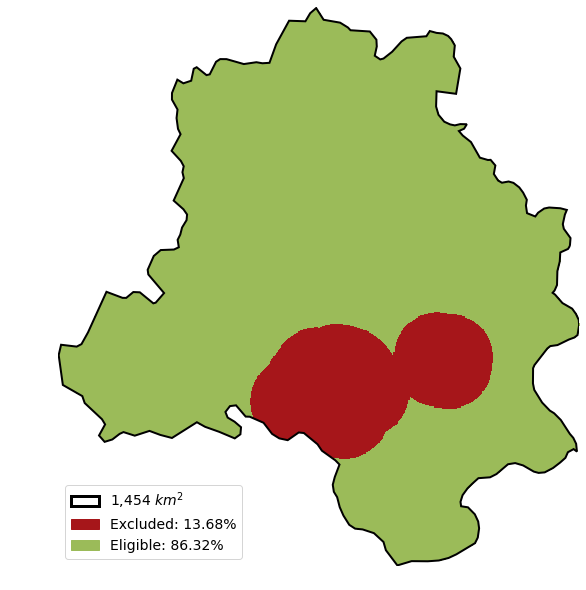

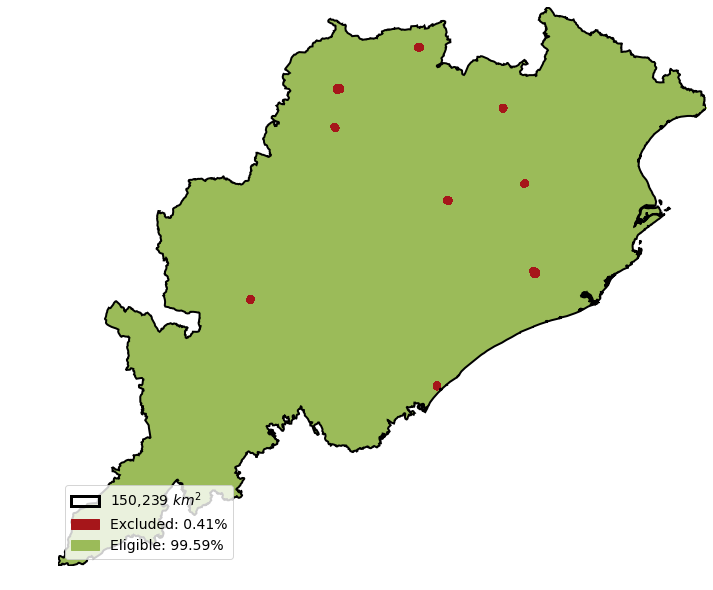

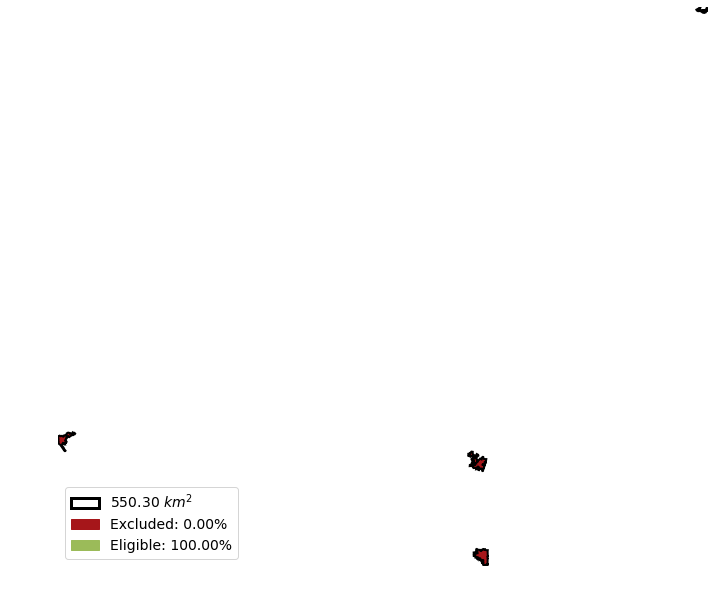

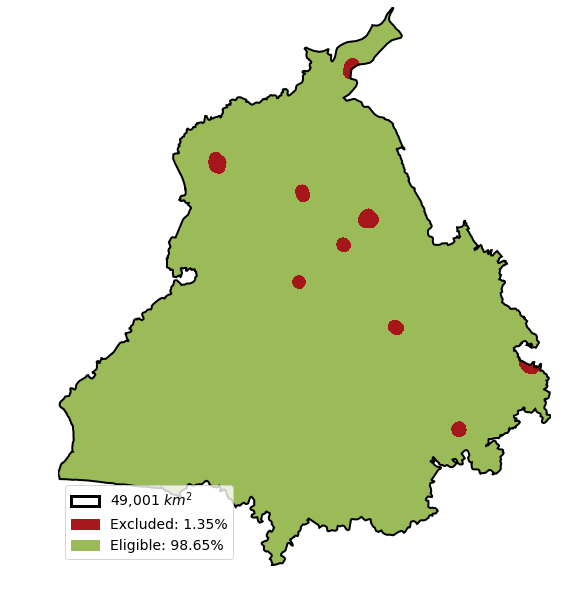

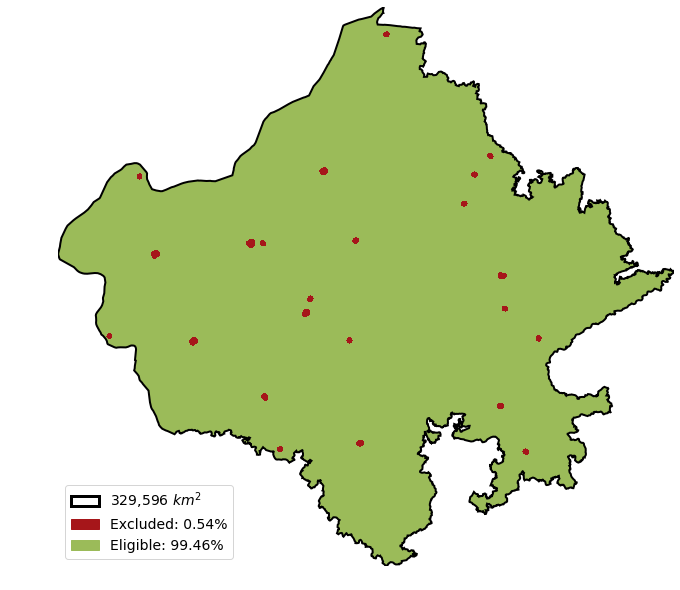

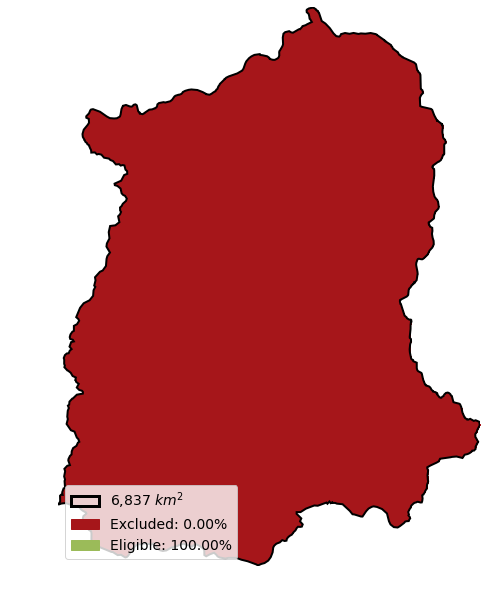

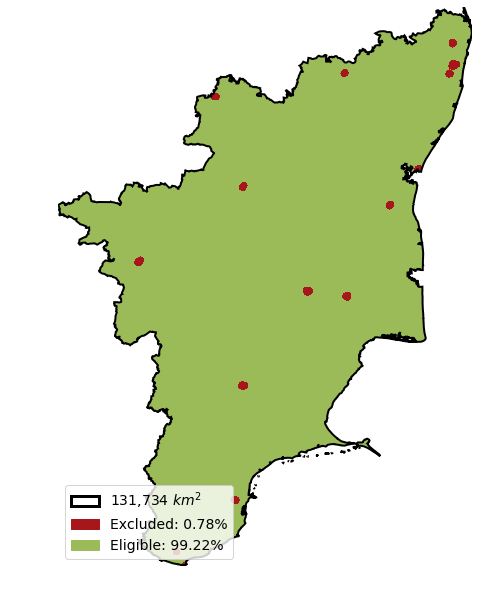

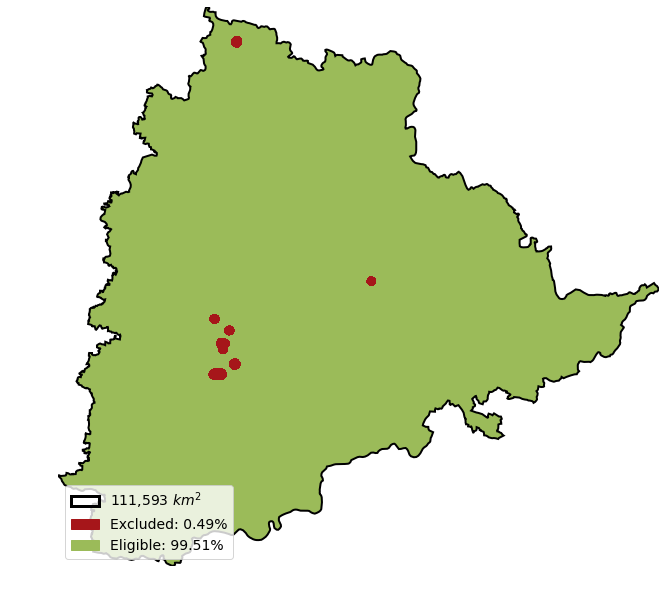

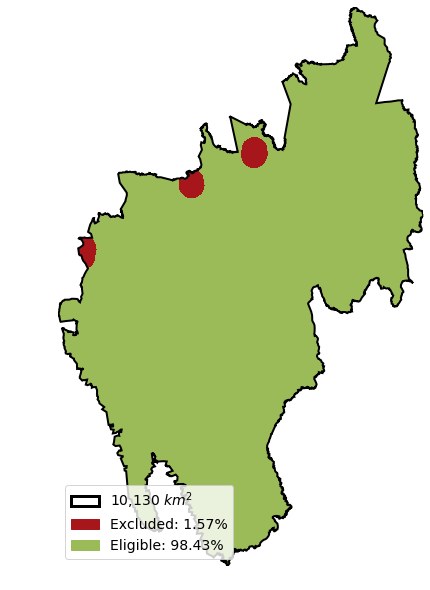

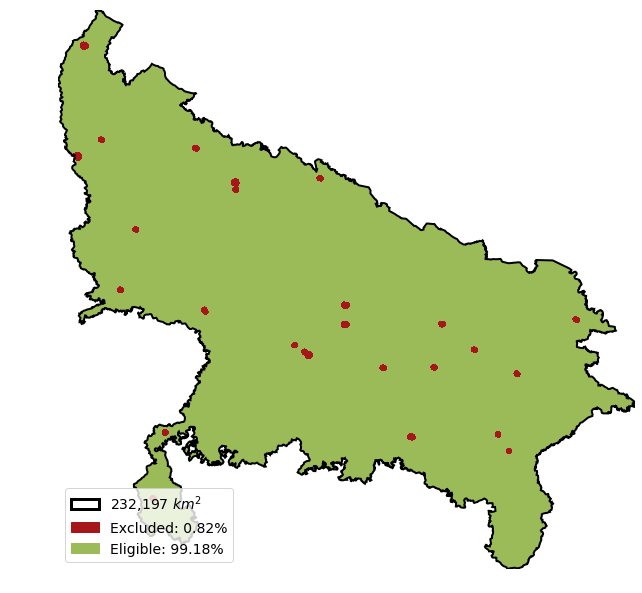

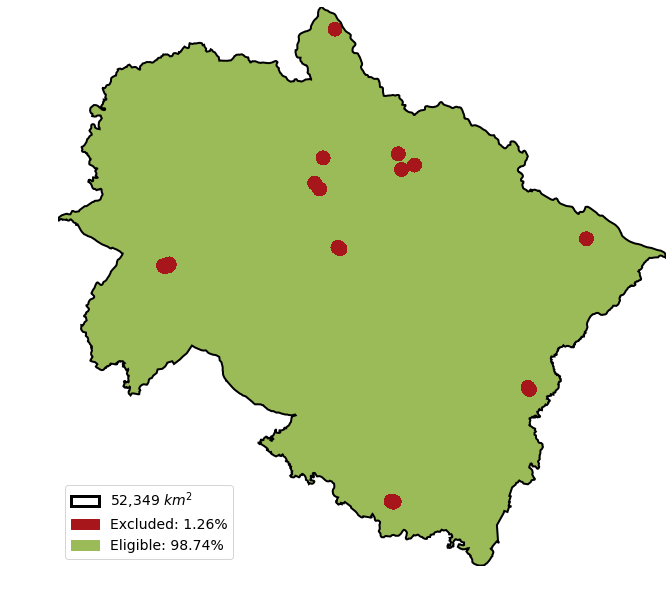

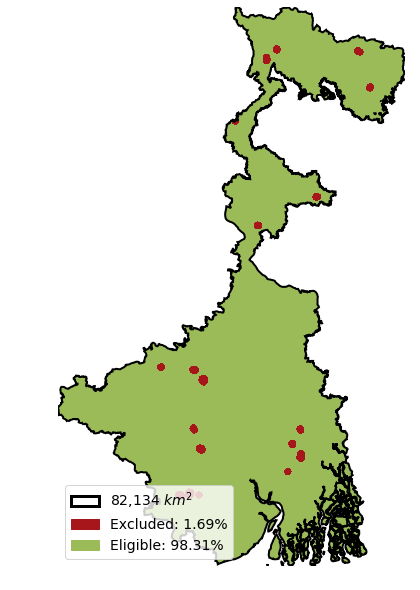

In [16]:
state_loop_tif_generator(demSource=demSource_1)

Processing the rastor file of India...


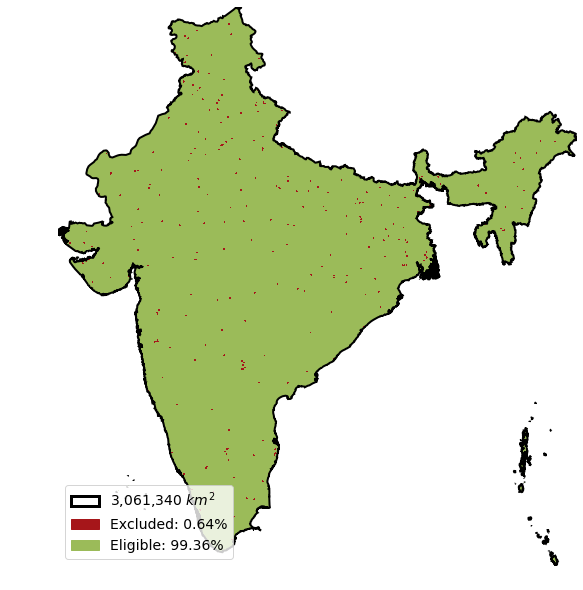

In [7]:
# To show already developed national level rastor files

rm = gk.RegionMask.load(mainSource_outer, srs=india_srs, pixelSize=selected_pixel_size)

ec_country = gl.ExclusionCalculator(rm) 
print('Processing the rastor file of India...')

demSource = r"C:\Users\n.pawar\Calculations\Land Eligibility\onshore_wind\sociopolitical\airport_airfield_proximity\onshore_airport_airfield_proximity_india.tif"
clippedSource = rm.extent.mutateRaster(demSource, output=None)
ec_country.excludeRasterType(clippedSource, value=(100, None), invert=True)
ec_country.draw()

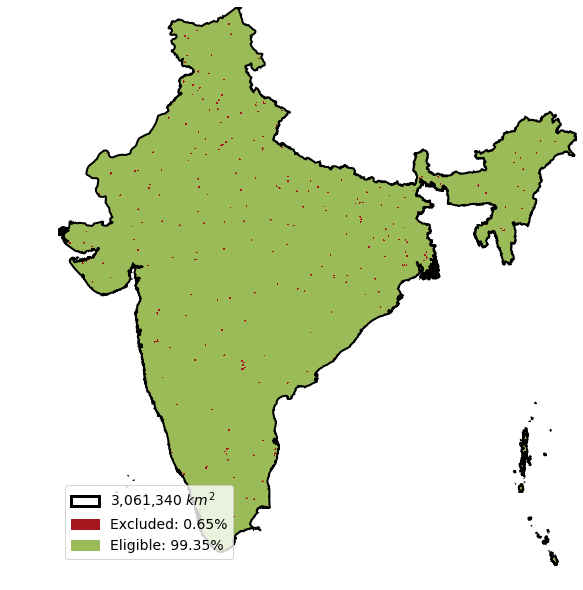

In [19]:
# Source 1
'''To apply the exclusion criterion'''
India.excludeVectorType(r"C:\Users\n.pawar\Calculations\Land Eligibility\onshore_wind\Sociopolitical\airport_airfield_proximity\shapefiles\airport_airfield_proximity_1.shp", buffer = 4000)
India.draw()

In [20]:
India.save("onshore_airport_airfield_proximity_india.tif")

In [ ]:
import os.path

save_path = 'C:\Users\n.pawar\Calculations\Land Eligibility\trial'

name_of_file = raw_input("What is the name of the file: ")

completeName = os.path.join(save_path, name_of_file+".txt")         

file1 = open(completeName, "w")

toFile = raw_input("Write what you want into the field")

file1.write(toFile)

file1.close()

In [40]:
help(gl.ExclusionCalculator)

Help on class ExclusionCalculator in module glaes.core.ExclusionCalculator:

class ExclusionCalculator(builtins.object)
 |  The ExclusionCalculator object makes land eligibility (LE) analyses easy 
 |  and quick. Once initialized to a particular region, the ExclusionCalculator 
 |  object can be used to incorporate any geospatial dataset (so long as it is 
 |  interpretable by GDAL) into the LE analysis. 
 |  
 |  
 |  Note:
 |  ----- 
 |  By default, ExclusionCalculator is always initialized at 100x100 meter 
 |  resolution in the EPSG3035 projection system. This is well-suited to LE 
 |  analyses in Europe, however if another region is being investigated or else 
 |  if another resolution or projection system is desired for any other reason, 
 |  this can be incorporated as well during the initialization stage.
 |  
 |  If you need to find a new projection system for your analyses, the following 
 |  website is helpful: http://spatialreference.org/ref/epsg/
 |  
 |  
 |  Initializati

In [ ]:
plt.savefig(...)

Processing the state Andhra Pradesh ...


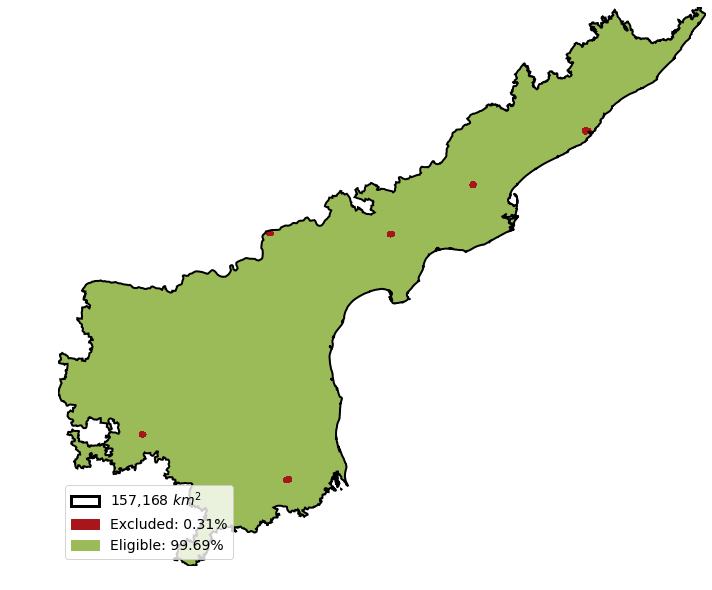

In [97]:


rm = gk.RegionMask.load(mainSource_inner, where = 1, srs=india_srs, pixelSize=selected_pixel_size)
    
ec = gl.ExclusionCalculator(rm) 
print('Processing the state',df_mainSource_inner.iloc[1]['NAME_1'],'...')
        
ec.excludeVectorType(demSource_1, buffer=constraint_buffer) 
    
ec.draw()
technology = 'onshore'
path_constraint_class = r'C:\Users\n.pawar\Calculations\Land Eligibility\trial'
path_constraint = '/xyz'
#final_path = path_constraint_class + path_constraint
ec.save(path_constraint_class  + path_constraint + '.tif')
#ec.save(technology + "_" + constraint_name + "_" + df_mainSource_inner.iloc[1]['NAME_1'] + "_" + demSource_name + ".tif")
        

In [70]:
technology = 'onshore'
x = 'onshore_' + 'abc'
path = r'C:\Users\n.pawar\Calculations\Land Eligibility\trial/' + technology

In [71]:
path

'C:\\Users\\n.pawar\\Calculations\\Land Eligibility\\trial/onshore'

In [61]:
ve

'waa'

In [ ]:
path_constraint_class = 'C:\Users\n.pawar\Calculations\Land Eligibility\onshore_wind\Sociopolitical'
path_constraint = '\settlement_proximity'

In [79]:
path_constraint_class = r'C:\Users\n.pawar\Calculations\Land Eligibility'
path_constraint = '\trail/'
x=path_constraint_class+path_constraint

In [80]:
x

'C:\\Users\\n.pawar\\Calculations\\Land Eligibility\trail/'

In [110]:
constraint_class = 'sociopolitical'
constraint_name = 'airport_airfield_proximity'
constraint_class_list = ['sociopolitical', 'political', 'economic']

In [111]:
for value in constraint_class_list:
    if value == 'sociopolitical':
        print('sociopolitical')
    elif value == 'political':
        print('political')
    else:
        print('economic')

sociopolitical
political
economic
